In [ ]:
import ScraperFC as sfc
import traceback

In [ ]:
scraper = sfc.Understat()
try:
    lg_table = scraper.scrape_league_table(year=2024, league='EPL')
except Exception as e:
    traceback.print_exc()
    raise
finally:
    scraper.close()

In [ ]:
understat_table = lg_table[['Team', 'W', 'D', 'L', 'G', 'GA', 'xG', 'xGA', 'NPxG',
                            'NPxGA', 'PPDA', 'OPPDA', 'PTS', 'xPTS']]
understat_table['season'] = 2324
understat_table['league'] = 'ENG-Premier League'

understat_table.loc[understat_table['Team'] == 'Manchester United', 'Team'] = 'Manchester Utd'
understat_table.loc[understat_table['Team'] == 'Newcastle United', 'Team'] = 'Newcastle Utd'
understat_table.loc[understat_table['Team'] == 'Tottenham Hotspur', 'Team'] = 'Tottenham'
understat_table.loc[understat_table['Team'] == 'Wolverhampton Wanderers', 'Team'] = 'Wolves'
understat_table.loc[understat_table['Team'] == 'Nottingham Forest', 'Team'] = "Nott'ham Forest"
understat_table.loc[understat_table['Team'] == 'Leicester', 'Team'] = 'Leicester City'
understat_table.loc[understat_table['Team'] == 'Leeds', 'Team'] = 'Leeds United'
understat_table.loc[understat_table['Team'] == 'Sheffield United', 'Team'] = "Sheffield Utd"
understat_table.loc[understat_table['Team'] == 'Luton', 'Team'] = 'Luton Town'
understat_table.loc[understat_table['Team'] == 'Norwich', 'Team'] = 'Norwich City'

understat_table.sort_values(by=['league', 'season', 'Team'], ascending=True, inplace=True)
understat_table.reset_index(drop=True, inplace=True)

understat_table.rename(columns={'Team': 'TEAM_NAME', 'W': 'TEAM_WINS', 'D': 'TEAM_DRAWS', 'league': 'COMPETITION',
                                'L': 'TEAM_LOSSES', 'xPTS': 'TEAM_XPTS', 'PTS': 'TEAM_PTS', 'season': 'SEASON',
                                'NPxGA': 'NPXG_AGAINST', 'xGA': 'XG_AGAINST'}, inplace=True)

understat_table.set_index(['COMPETITION', 'SEASON', 'TEAM_NAME'], inplace=True)

In [ ]:
import soccerdata as sd
import datetime
import pandas as pd

In [ ]:
def make_season_integer(df):
    indexes = df.index.names
    df = df.reset_index()
    df['SEASON'] = df['SEASON'].astype(int)
    df = df.set_index(indexes)
    return df

In [ ]:
fbref = sd.FBref(leagues="ENG-Premier League", seasons=["2324"], no_cache=True)
fbref_team_standard = fbref.read_team_season_stats(stat_type='standard')

In [ ]:
fbref = sd.FBref(leagues="ENG-Premier League", seasons=["2324"])
fbref_team_standard = fbref.read_team_season_stats(stat_type='standard')

In [ ]:
fbref_team_standard = fbref_team_standard.rename_axis(index={'team': 'TEAM_NAME', 'season': 'SEASON', 'league': 'COMPETITION'})

In [ ]:
fbref_team_standard = make_season_integer(fbref_team_standard)

In [ ]:
import pickle

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
team_names = fbref_team_standard.reset_index()[['TEAM_NAME','url']]
team_names['TEAM_FBREF_ID'] = team_names['url'].apply(lambda x: x.split('/')[3])      ## Extracting team_id from URL
team_names.drop(columns=['url'], inplace=True)
team_names.columns = team_names.columns.droplevel(1)

In [ ]:
team_names['TEAM_FBREF_ID'] = team_names['TEAM_FBREF_ID'].astype('string')
team_names.drop_duplicates(inplace=True)

In [ ]:
team_matches_played = fbref_team_standard['Playing Time'].MP

In [ ]:
team_standard_stats = understat_table.copy()
team_standard_stats['MATCHES_PLAYED'] = team_matches_played

In [ ]:
team_standard_stats.reset_index(inplace=True)

In [ ]:
team_standard_stats = team_standard_stats.merge(team_names, on='TEAM_NAME', how='left')

In [ ]:
team_standard_stats = team_standard_stats[['TEAM_FBREF_ID','SEASON','COMPETITION','MATCHES_PLAYED','TEAM_WINS', 
                                           'TEAM_DRAWS', 'TEAM_LOSSES', 'TEAM_PTS', 'TEAM_XPTS']]

In [ ]:
pickle.dumps(fbref_team_standard)

In [ ]:
team_attacking_stats = understat_table.copy()

In [ ]:
team_attacking_stats = team_attacking_stats.reset_index().merge(team_names, on='TEAM_NAME', how='left')

In [ ]:
team_attacking_stats = team_attacking_stats[['TEAM_NAME','TEAM_FBREF_ID','COMPETITION','SEASON','NPxG','xG']]

In [ ]:
team_attacking_stats.rename(columns={'NPxG': 'NPXG', 'xG':'XG'}, inplace=True)

In [ ]:
team_attacking_stats.set_index(['COMPETITION', 'SEASON', 'TEAM_NAME'], inplace=True)

In [ ]:
team_attacking_stats

In [ ]:
fbref_team_shooting = fbref.read_team_season_stats(stat_type='shooting')
fbref_team_passing = fbref.read_team_season_stats(stat_type='passing')
fbref_team_possession = fbref.read_team_season_stats(stat_type='possession')
fbref_team_misc = fbref.read_team_season_stats(stat_type='misc')

In [ ]:
fbref_team_shooting = fbref_team_shooting.rename_axis(index={'team': 'TEAM_NAME', 'season': 'SEASON', 'league': 'COMPETITION'})
fbref_team_passing = fbref_team_passing.rename_axis(index={'team': 'TEAM_NAME', 'season': 'SEASON', 'league': 'COMPETITION'})
fbref_team_possession = fbref_team_possession.rename_axis(index={'team': 'TEAM_NAME', 'season': 'SEASON', 'league': 'COMPETITION'})
fbref_team_misc = fbref_team_misc.rename_axis(index={'team': 'TEAM_NAME', 'season': 'SEASON', 'league': 'COMPETITION'})

In [ ]:
fbref_team_shooting = make_season_integer(fbref_team_shooting)
fbref_team_passing = make_season_integer(fbref_team_passing)
fbref_team_possession = make_season_integer(fbref_team_possession)
fbref_team_misc = make_season_integer(fbref_team_misc)

In [ ]:
team_goals_scored = understat_table.G
team_shots = fbref_team_shooting['Standard'].Sh
team_shotsOT = fbref_team_shooting['Standard'].SoT
team_pass_completed = fbref_team_passing["Total"].Cmp
team_pass_attempted = fbref_team_passing["Total"].Att
team_takeons_attempted = fbref_team_possession['Take-Ons'].Att
team_takeons_completed = fbref_team_possession['Take-Ons'].Succ
team_crossesintoPA = fbref_team_passing['CrsPA']
team_fouls_against = fbref_team_misc['Performance']['Fld']

In [ ]:
team_shotsOT

In [ ]:
team_attacking_stats['GOALS_SCORED'] = team_goals_scored
team_attacking_stats['SHOTS'] = team_shots
team_attacking_stats['SHOTS_ON_TARGET'] = team_shotsOT
team_attacking_stats['PASS_COMPLETED'] = team_pass_completed
team_attacking_stats['PASS_ATTEMPTED'] = team_pass_attempted
team_attacking_stats['TAKEONS_ATTEMPTED'] = team_takeons_attempted
team_attacking_stats['TAKEONS_COMPLETED'] = team_takeons_completed
team_attacking_stats['CROSSES_INTO_PA'] = team_crossesintoPA
team_attacking_stats['FOULS_AGAINST'] = team_fouls_against

In [11]:
import pandas as pd
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
from sklearn.preprocessing import MinMaxScaler
from google.cloud import storage

from plottable import ColDef, Table
from plottable.plots import image
from plottable.cmap import centered_cmap

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import io
import base64
import urllib

In [2]:
def extract_from_db(tables_list, season):
    SNOWFLAKE_USER = 'kbharaj3'
    SNOWFLAKE_PASSWORD = 'Snowfl@key0014'
    SNOWFLAKE_ACCOUNT = 'qx25653.ca-central-1.aws'
    SNOWFLAKE_WAREHOUSE = 'FOOTY_STORE'
    SNOWFLAKE_DATABASE = 'GEGENSTATS'
    SNOWFLAKE_SCHEMA = 'TABLES'

    conn = snowflake.connector.connect(
        user=SNOWFLAKE_USER,
        password=SNOWFLAKE_PASSWORD,
        account=SNOWFLAKE_ACCOUNT,
        warehouse=SNOWFLAKE_WAREHOUSE,
        database=SNOWFLAKE_DATABASE,
        schema=SNOWFLAKE_SCHEMA
    )

    cursor = conn.cursor()

    requested_dataframes = []

    for table in tables_list:
        if "_" in table:
            query = f"SELECT * FROM {table} WHERE SEASON = {season}"
        else:
            query = f"SELECT * FROM {table}"
        cursor.execute(query)
        requested_rows = cursor.fetchall()
        column_names = [desc[0] for desc in cursor.description]
        requested_df = pd.DataFrame(requested_rows, columns=column_names)
        requested_dataframes.append(requested_df)

    return requested_dataframes

In [3]:
xpts_tables = ["TEAMS", "TEAM_ATTACKING_STATS", "TEAM_DEFENDING_STATS",
                    "TEAM_STANDARD_STATS", "COMPETITIONS"]

In [4]:
team_names, team_attacking, team_defending, team_standard, df_competitions = extract_from_db(xpts_tables, season=2324)

In [5]:
team_standard = team_standard.merge(df_competitions[['COMPETITION','COMPETITION_ACRONYM','SEASON']], on=['COMPETITION','SEASON'], how='left')
team_attacking = team_attacking.merge(df_competitions[['COMPETITION','COMPETITION_ACRONYM','SEASON']], on=['COMPETITION','SEASON'], how='left')
team_defending = team_defending.merge(df_competitions[['COMPETITION','COMPETITION_ACRONYM','SEASON']], on=['COMPETITION','SEASON'], how='left')

In [6]:
df_table = team_standard[['TEAM_FBREF_ID', 'SEASON','COMPETITION_ACRONYM', 'TEAM_PTS', 'TEAM_XPTS']]

In [7]:
df_table = df_table.merge(team_names, how='left', on='TEAM_FBREF_ID')
df_table = df_table.merge(team_attacking[['TEAM_FBREF_ID', 'SEASON','COMPETITION_ACRONYM','GOALS_SCORED', 'XG']], 
                          on=['TEAM_FBREF_ID', 'COMPETITION_ACRONYM','SEASON'])
df_table = df_table.merge(team_defending[['TEAM_FBREF_ID', 'SEASON', 'COMPETITION_ACRONYM','GOALS_CONCEDED', 'XG_AGAINST']], 
                          on=['TEAM_FBREF_ID', 'COMPETITION_ACRONYM','SEASON'])
df_table["GOAL_DIFFERENCE"] = df_table["GOALS_SCORED"] - df_table["GOALS_CONCEDED"]

In [8]:
## Create emply datframe called PTS_table with columns 'TEAM_NAME','TEAM_PTS', 'GOAL_DIFFERENCE','GOALS_SCORED','GOALS_CONCEDED', 'index'"Power BI"
base64_table = pd.DataFrame(columns=['COMPETITION_ACRONYM', 'SEASON', 'TABLE_BASE64'])

In [9]:
options = df_table[['COMPETITION_ACRONYM', 'SEASON']].drop_duplicates().reset_index(drop=True)

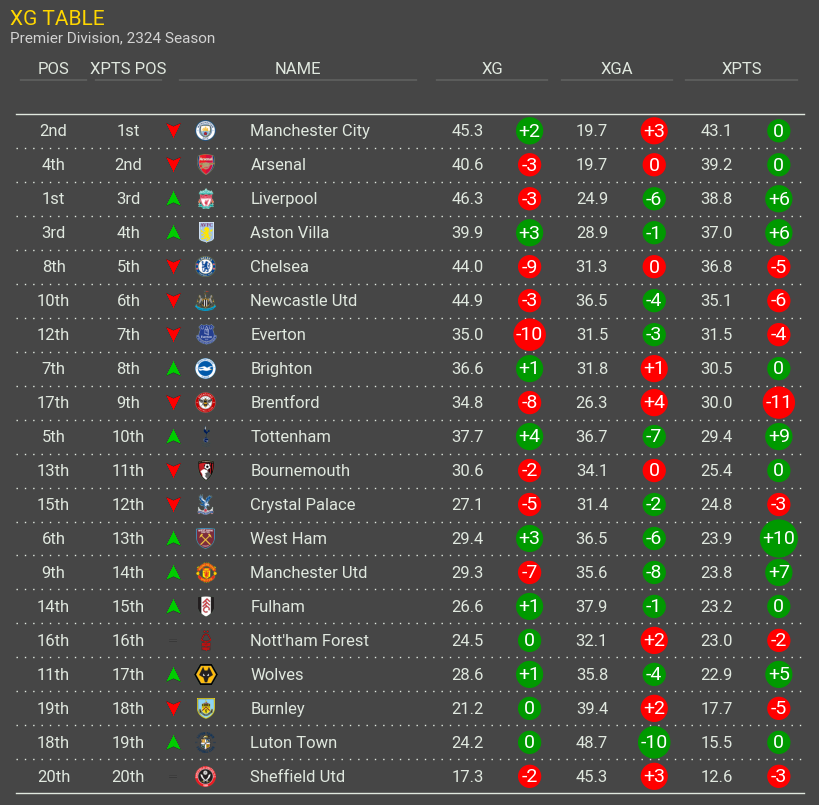

In [12]:
colors_pos = [(1, 0, 0), (0, 0.6, 0)]  # Red to Green
colors_neg = [(0, 0.6, 0), (1, 0, 0)]  # Green to Red
n_bins = 2 # Discretizes the interpolation into bins
cmap_name = 'custom_red_green'
cm_pos = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors_pos, N=n_bins)
cm_neg = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors_neg, N=n_bins)


def plus_sign_formatter(value):
    return f"+{value:.0f}" if value > 0 else f"{value:.0f}"

listos = []


for index, row in options.iterrows():
    df_filtered = df_table[df_table['COMPETITION_ACRONYM'] == row['COMPETITION_ACRONYM']]
    df_filtered = df_filtered[df_filtered['SEASON'] == row['SEASON']]

    PTS_table = df_filtered[['TEAM_NAME','TEAM_PTS', 'GOAL_DIFFERENCE','GOALS_SCORED','GOALS_CONCEDED']].sort_values(['TEAM_PTS', 
                    'GOAL_DIFFERENCE','GOALS_SCORED','GOALS_CONCEDED'], ascending=False).reset_index(drop=True).reset_index()
    
    PTS_table.rename(columns={'index':'POS_NUM'}, inplace=True)
    PTS_table.POS_NUM += 1

    ## Change POS_NUM colun in PTS_table from 1,2,3 to 1st, 2nd,3rd etc/
    def ordinal(n):
        return "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])

    PTS_table['POS'] = PTS_table['POS_NUM'].apply(ordinal)

    XPTS_table = df_filtered[['TEAM_NAME','TEAM_XPTS', 'GOAL_DIFFERENCE','GOALS_SCORED'
          ,'GOALS_CONCEDED']].sort_values(['TEAM_XPTS', 'GOAL_DIFFERENCE','GOALS_SCORED','GOALS_CONCEDED'],
                                          ascending=False).reset_index(drop=True).reset_index()
    
    XPTS_table.rename(columns={'index':'XPTS POS_NUM'}, inplace=True)
    XPTS_table['XPTS POS_NUM'] += 1

    XPTS_table['XPTS POS'] = XPTS_table['XPTS POS_NUM'].apply(ordinal)

    PTS_XPTS_table = XPTS_table.merge(PTS_table, how='left', on=['TEAM_NAME','GOAL_DIFFERENCE','GOALS_SCORED','GOALS_CONCEDED'])

    PTS_XPTS_table = PTS_XPTS_table[['TEAM_NAME','XPTS POS','XPTS POS_NUM','POS','POS_NUM']]

    df_filtered = df_filtered.merge(PTS_XPTS_table, how='left', on='TEAM_NAME')

    df_filtered.rename(columns={'TEAM_LOGO_URL':'TEAM_LOGO'}, inplace=True)

    import warnings
    warnings.filterwarnings("ignore")

    fin_table = df_filtered[['POS','POS_NUM','TEAM_LOGO','XPTS POS','XPTS POS_NUM','TEAM_NAME','XG','GOALS_SCORED','XG_AGAINST',
            'GOALS_CONCEDED','TEAM_PTS','TEAM_XPTS']].sort_values('XPTS POS_NUM')
    fin_table['POS_NUM_DIFF'] = fin_table.apply(lambda row: 'https://i.imgur.com/AACUEGy.png' if row['POS_NUM'] == row['XPTS POS_NUM'] else \
                                                'https://i.imgur.com/5sTTYXm.png' if row['POS_NUM'] < row['XPTS POS_NUM'] else 'https://i.imgur.com/dGsmsnm.png', axis=1)
    fin_table['XG_DIFF'] = fin_table['GOALS_SCORED']-fin_table['XG']
    fin_table['XGA_DIFF'] = fin_table['GOALS_CONCEDED']-fin_table['XG_AGAINST']
    fin_table['XPTS_DIFF'] = fin_table['TEAM_PTS']-fin_table['TEAM_XPTS']
    fin_table = fin_table[['POS','XPTS POS','POS_NUM_DIFF','TEAM_LOGO','TEAM_NAME','XG','XG_DIFF',
            'XG_AGAINST','XGA_DIFF','TEAM_XPTS','XPTS_DIFF']]
    fin_table['XG_DIFF'] = fin_table['XG_DIFF'].astype(int)
    fin_table['XGA_DIFF'] = fin_table['XGA_DIFF'].astype(int)
    fin_table['XPTS_DIFF'] = fin_table['XPTS_DIFF'].astype(int)

    fin_table = fin_table.set_index(['POS'])

    team_name_cols = ['TEAM_LOGO','TEAM_NAME']
    xG_cols = ['XG','XG_DIFF']
    xGA_cols = ['XG_AGAINST','XGA_DIFF']
    xPTS_cols = ['TEAM_XPTS','XPTS_DIFF']

    fin_table['TEAM_LOGO'] = fin_table['TEAM_LOGO'].apply(lambda x: (io.BytesIO(urllib.request.urlopen(x).read())))
    fin_table['POS_NUM_DIFF'] = fin_table['POS_NUM_DIFF'].apply(lambda x: (io.BytesIO(urllib.request.urlopen(x).read())))

    plt.rcParams["font.family"] = ["Roboto"]
    plt.rcParams["savefig.bbox"] = "tight"
    plt.rcParams["text.color"] = "#e0e8df"

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_title('XG TABLE', fontsize=15, fontweight='bold', color='gold', 
                loc='left',pad=15)

    subtitle_y_position = 1.005  # Adjust this value as needed
    ax.text(0.0, subtitle_y_position, f"Premier Division, {row['SEASON']} Season", 
            fontsize=11, color='lightgray', transform=ax.transAxes)

    fig.set_facecolor("#464646")
    ax.set_facecolor("#464646")

    fig.subplots_adjust(top=0.85, bottom=0.1, left=0.1, right=0.9)

    col_defs = (
        [
        ColDef(name="POS", title="", group="POS",textprops={"ha": "center", "weight": "bold"}, width=0.3),
        ColDef(name="XPTS POS", title="", group="XPTS POS", textprops={"ha": "center", "weight": "bold"}, width=0.3),
        ColDef(name="POS_NUM_DIFF", title="", group="NAME",textprops={"ha": "center"}, width=0.06,plot_fn=image),
        ColDef(name="TEAM_LOGO", title="", group="NAME",textprops={"ha": "center"}, width=0.2, plot_fn=image),
        ColDef(name="TEAM_NAME", title="",group="NAME",textprops={"ha": "left"}, width=0.8),
        ColDef(name="XG", title="", group="XG",textprops={"ha": "center"}, formatter="{:.1f}", width=0.3),
        ColDef(name="XG_DIFF", title="", group="XG", textprops={"ha": "center","fontsize": 14,"fontweight": "bold","bbox": {"boxstyle": "circle,pad=0.1"}}, 
            formatter=plus_sign_formatter, width=0.2, cmap=centered_cmap(fin_table["XG_DIFF"], cmap=cm_pos, center=0)),
        ColDef(name="XG_AGAINST", title="", group="XGA",textprops={"ha": "center",}, formatter="{:.1f}", width=0.3),
        ColDef(name="XGA_DIFF", title="", group="XGA",textprops={"ha": "center","fontsize": 14,"fontweight": "bold","bbox": {"boxstyle": "circle,pad=0.1"}}, 
            width=0.2, formatter=plus_sign_formatter,cmap=centered_cmap(fin_table["XG_DIFF"], cmap=cm_neg, center=0)),
        ColDef(name="TEAM_XPTS", title="", group="XPTS",textprops={"ha": "center"}, formatter="{:.1f}", width=0.3),
        ColDef(name="XPTS_DIFF", title="", group="XPTS",textprops={"ha": "center","fontsize": 14,"fontweight": "bold","bbox": {"boxstyle": "circle,pad=0.1"}}, 
            width=0.2, formatter=plus_sign_formatter,cmap=centered_cmap(fin_table["XG_DIFF"], cmap=cm_pos, center=0)),
        ]
    )

    table = Table(
        fin_table,
        column_definitions=col_defs,
        row_dividers=True,
        footer_divider=True,
        ax=ax,
        textprops={"fontsize": 12},
        row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
        col_label_divider={"linewidth": 1, "linestyle": (0, (1, 5))},
    )

    table.autoset_fontcolors(colnames=["XG_DIFF", "XGA_DIFF", "XPTS_DIFF"])

    buf = io.BytesIO()

    # Save the figure to the buffer
    fig.savefig(buf, format='png')

    # Seek to the start of the buffer
    buf.seek(0)

    encoded_data = base64.b64encode(buf.getvalue()).decode()

    # listos.append(encoded_data)

    new_row = {
        'COMPETITION_ACRONYM': row['COMPETITION_ACRONYM'],
        'SEASON': row['SEASON'],
        'TABLE_BASE64': encoded_data
    }

    base64_table = pd.concat([base64_table, pd.DataFrame([[row['COMPETITION_ACRONYM'], row['SEASON'], encoded_data]], 
                                      columns=['COMPETITION_ACRONYM','SEASON','TABLE_BASE64'])])


In [14]:
base64_table

,COMPETITION_ACRONYM,SEASON,TABLE_BASE64
0,EPL,2324,iVBORw0KGgoAAAANSUhEUgAAAzMAAAMlCAYAAABHJK0wAA...


In [16]:
base64_table = base64_table.rename(columns={'TABLE_BASE64':'TABLE_IMAGE'})

In [20]:
len(base64_table['TABLE_IMAGE'].iloc[0])

246364